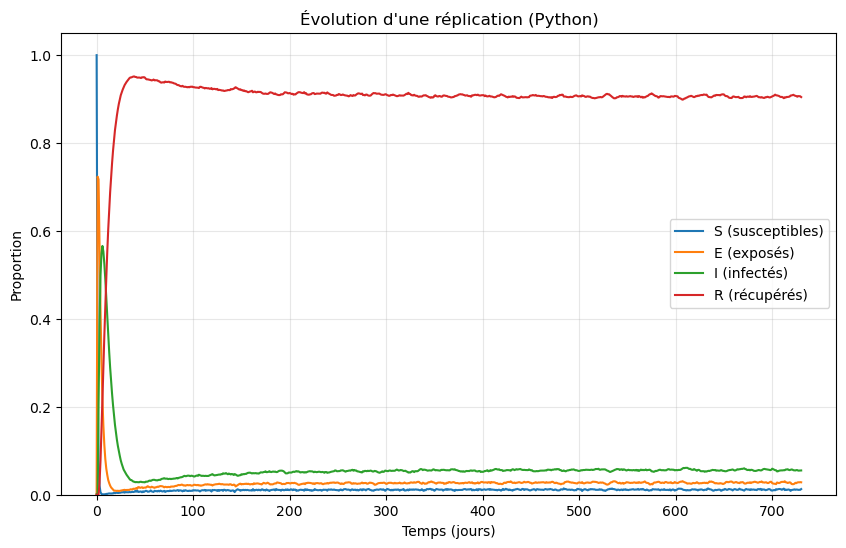

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../partie2/results/python/replication_1.csv')

plt.figure(figsize=(10,6))
plt.plot(df['time'], df['S']/20000, label='S (susceptibles)')
plt.plot(df['time'], df['E']/20000, label='E (exposés)')
plt.plot(df['time'], df['I']/20000, label='I (infectés)')
plt.plot(df['time'], df['R']/20000, label='R (récupérés)')
plt.xlabel('Temps (jours)')
plt.ylabel('Proportion')
plt.title('Évolution d\'une réplication (Python)')
plt.legend()
plt.grid(alpha=0.3)
plt.ylim(0,1.05)
plt.savefig('../figures/part2_one_run_python.png', dpi=150)
plt.show()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
reps = []
for i in range(1, 4):
    df = pd.read_csv(f'../partie2/results/python/replication_{i}.csv')
    df['rep'] = i
    reps.append(df)

all_python = pd.concat(reps)
print("Forme des données :", all_python.shape)

Forme des données : (2193, 6)


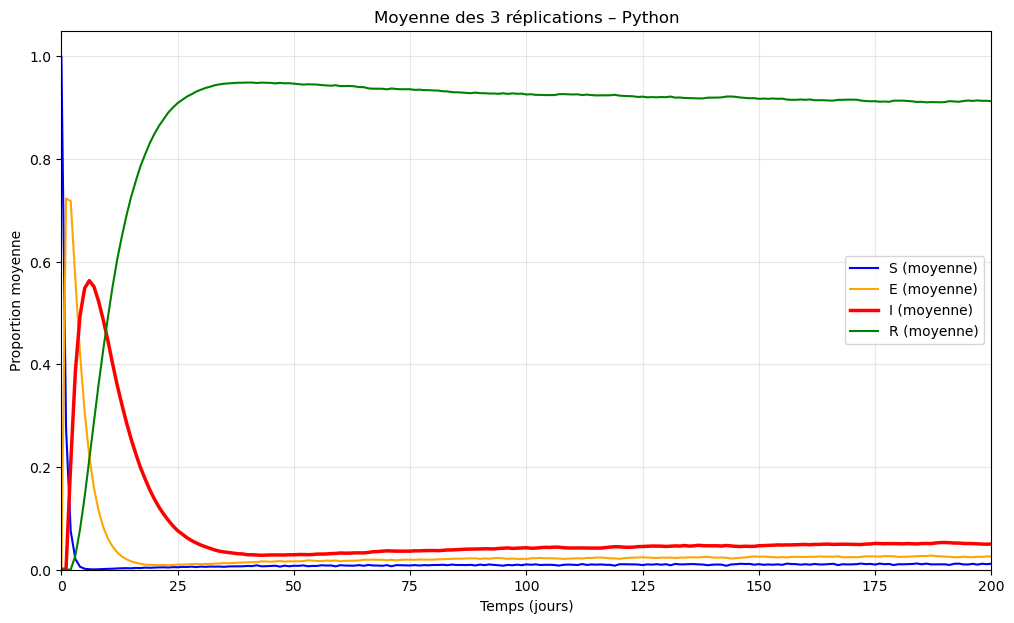

In [4]:
mean_df = all_python.groupby('time')[['S', 'E', 'I', 'R']].mean().reset_index()

plt.figure(figsize=(12, 7))
plt.plot(mean_df['time'], mean_df['S']/20000, label='S (moyenne)', color='blue')
plt.plot(mean_df['time'], mean_df['E']/20000, label='E (moyenne)', color='orange')
plt.plot(mean_df['time'], mean_df['I']/20000, label='I (moyenne)', color='red', linewidth=2.5)
plt.plot(mean_df['time'], mean_df['R']/20000, label='R (moyenne)', color='green')

plt.xlabel('Temps (jours)')
plt.ylabel('Proportion moyenne')
plt.title('Moyenne des 3 réplications – Python')
plt.legend()
plt.grid(alpha=0.3)
plt.ylim(0, 1.05)
plt.xlim(0, 200)  # zoom sur la phase épidémique
plt.savefig('../figures/part2_python_mean_3reps.png', dpi=150, bbox_inches='tight')
plt.show()

In [6]:
peaks = []

for i in range(1, 4):
    df_rep = all_python[all_python['rep'] == i]
    max_I = df_rep['I'].max()
    day_max = df_rep[df_rep['I'] == max_I]['time'].iloc[0]
    peaks.append({'rep': i, 'lang': 'Python', 'max_I': max_I, 'day_peak': day_max})

peaks_df = pd.DataFrame(peaks)
print(peaks_df)

print("\nMoyenne hauteur pic I :", peaks_df['max_I'].mean())
print("Moyenne jour du pic :", peaks_df['day_peak'].mean())

   rep    lang  max_I  day_peak
0    1  Python  11308         6
1    2  Python  11222         6
2    3  Python  11259         6

Moyenne hauteur pic I : 11263.0
Moyenne jour du pic : 6.0


In [7]:
peaks_df.to_csv('../partie2/results/python_peaks_summary.csv', index=False)
print("Stats pics sauvegardées dans partie2/results/python_peaks_summary.csv")

Stats pics sauvegardées dans partie2/results/python_peaks_summary.csv


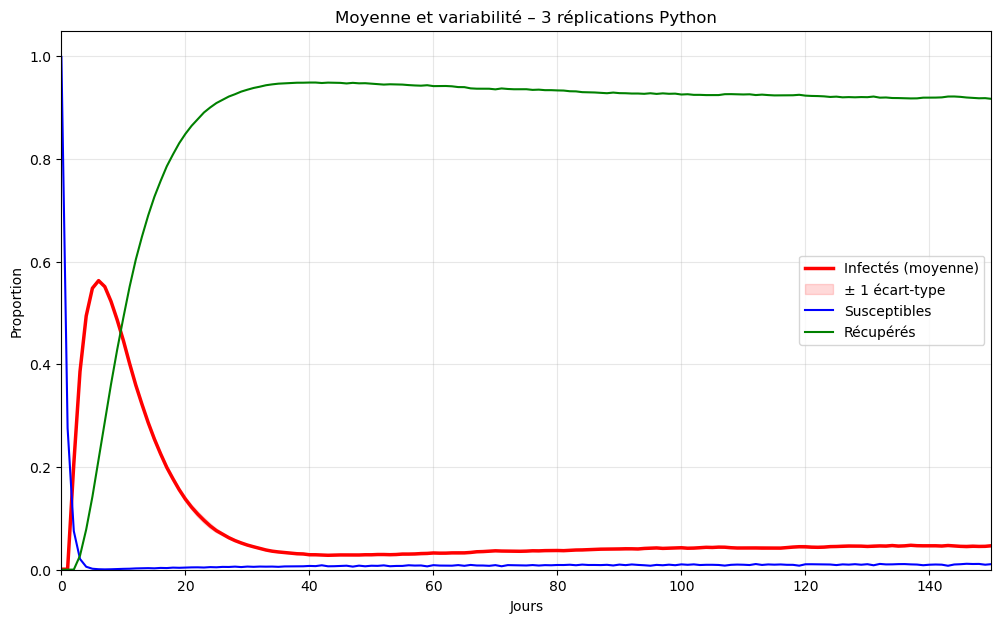

In [8]:
# Si pas déjà fait : charger les données
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dfs = []
for i in range(1,4):
    df = pd.read_csv(f'../partie2/results/python/replication_{i}.csv')
    df['rep'] = i
    dfs.append(df)

data = pd.concat(dfs)

# Moyenne et écart-type par jour
stats = data.groupby('time').agg(
    S_mean=('S', 'mean'),
    S_std=('S', 'std'),
    E_mean=('E', 'mean'),
    E_std=('E', 'std'),
    I_mean=('I', 'mean'),
    I_std=('I', 'std'),
    R_mean=('R', 'mean'),
    R_std=('R', 'std')
).reset_index()

# Graphique avec bandes d'écart-type
plt.figure(figsize=(12, 7))
plt.plot(stats['time'], stats['I_mean']/20000, label='Infectés (moyenne)', color='red', linewidth=2.5)
plt.fill_between(stats['time'],
                 (stats['I_mean'] - stats['I_std'])/20000,
                 (stats['I_mean'] + stats['I_std'])/20000,
                 color='red', alpha=0.15, label='± 1 écart-type')

plt.plot(stats['time'], stats['S_mean']/20000, label='Susceptibles', color='blue')
plt.plot(stats['time'], stats['R_mean']/20000, label='Récupérés', color='green')

plt.title('Moyenne et variabilité – 3 réplications Python')
plt.xlabel('Jours')
plt.ylabel('Proportion')
plt.ylim(0, 1.05)
plt.xlim(0, 150)
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('../figures/part2_python_mean_std.png', dpi=150, bbox_inches='tight')
plt.show()

In [9]:
pics = []

for rep_id in range(1,4):
    df_rep = data[data['rep'] == rep_id]
    max_I = df_rep['I'].max()
    jour_max = df_rep['time'][df_rep['I'].argmax()]
    pics.append({
        'langage': 'Python',
        'replication': rep_id,
        'hauteur_pic_I': max_I,
        'jour_pic': jour_max
    })

df_pics_python = pd.DataFrame(pics)
print(df_pics_python)

print("\nRésumé Python :")
print(df_pics_python[['hauteur_pic_I','jour_pic']].describe())

  langage  replication  hauteur_pic_I  jour_pic
0  Python            1          11308         6
1  Python            2          11222         6
2  Python            3          11259         6

Résumé Python :
       hauteur_pic_I  jour_pic
count       3.000000       3.0
mean    11263.000000       6.0
std        43.139309       0.0
min     11222.000000       6.0
25%     11240.500000       6.0
50%     11259.000000       6.0
75%     11283.500000       6.0
max     11308.000000       6.0


In [10]:
df_pics_python.to_csv('../partie2/results/python_pics_stats.csv', index=False)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Python (3 réplications)
dfs_py = []
for i in range(1, 4):
    try:
        df = pd.read_csv(f'../partie2/results/python/replication_{i}.csv')
        df['replication'] = i
        df['langage'] = 'Python'
        dfs_py.append(df)
    except:
        pass

# C (toutes les réplications disponibles)
dfs_c = []
for i in range(1, 21):   # adapte au nombre que tu as réellement
    try:
        df = pd.read_csv(f'../partie2/results/c/replication_{i}.csv')
        df['replication'] = i
        df['langage'] = 'C'
        dfs_c.append(df)
    except:
        pass

all_data = pd.concat(dfs_py + dfs_c, ignore_index=True)
print("Nombre total de lignes :", len(all_data))
print(all_data.groupby('langage')['replication'].nunique())

Nombre total de lignes : 13158
langage
C         15
Python     3
Name: replication, dtype: int64


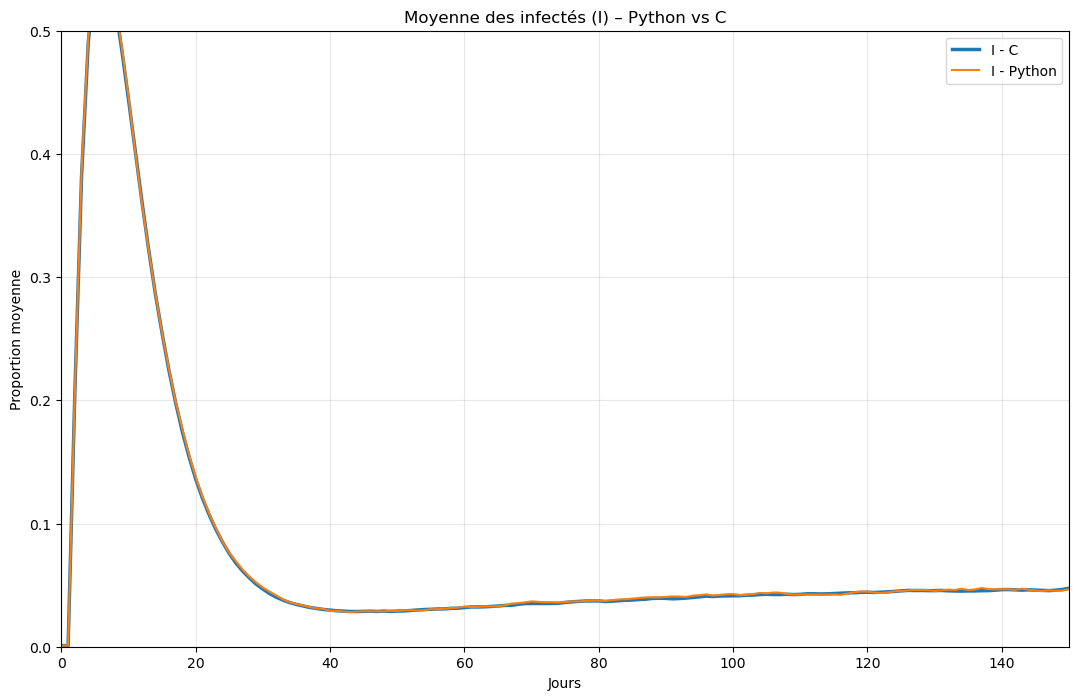

In [12]:
means = all_data.groupby(['langage', 'time'])[['S','E','I','R']].mean().reset_index()

plt.figure(figsize=(13, 8))

for lang in means['langage'].unique():
    sub = means[means['langage'] == lang]
    plt.plot(sub['time'], sub['I']/20000, label=f'I - {lang}', linewidth=2.5 if lang=='C' else 1.5)

plt.title("Moyenne des infectés (I) – Python vs C")
plt.xlabel("Jours")
plt.ylabel("Proportion moyenne")
plt.xlim(0, 150)
plt.ylim(0, 0.5)
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('../figures/part2_moyenne_I_python_vs_c.png', dpi=150, bbox_inches='tight')
plt.show()

        hauteur_pic_I                  jour_pic           
                 mean        std count     mean  std count
langage                                                   
C        11208.466667  68.400989    15      6.0  0.0    15
Python   11263.000000  43.139309     3      6.0  0.0     3


<Figure size 800x600 with 0 Axes>

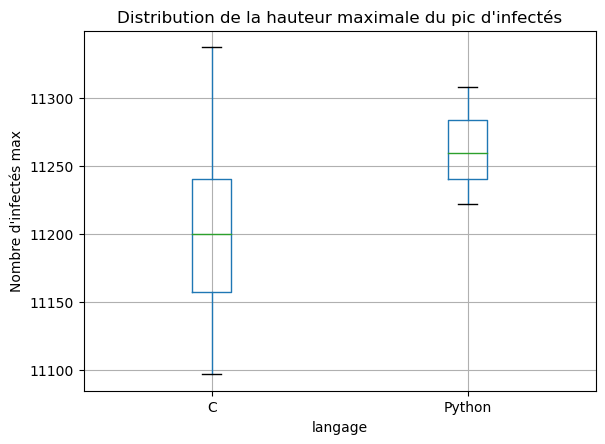

In [13]:
pics = []

for (lang, rep), group in all_data.groupby(['langage', 'replication']):
    if not group['I'].empty:
        max_i = group['I'].max()
        jour = group['time'][group['I'].idxmax()]
        pics.append({
            'langage': lang,
            'replication': rep,
            'hauteur_pic_I': max_i,
            'jour_pic': jour
        })

df_pics = pd.DataFrame(pics)

print(df_pics.groupby('langage')[['hauteur_pic_I', 'jour_pic']].agg(['mean','std','count']))

# Boxplot
plt.figure(figsize=(8,6))
df_pics.boxplot(column='hauteur_pic_I', by='langage')
plt.title("Distribution de la hauteur maximale du pic d'infectés")
plt.suptitle("")
plt.ylabel("Nombre d'infectés max")
plt.savefig('../figures/part2_boxplot_pic_I.png', dpi=150, bbox_inches='tight')
plt.show()

In [14]:
# Séparation des groupes
python_pics = df_pics[df_pics['langage'] == 'Python']['hauteur_pic_I']
c_pics = df_pics[df_pics['langage'] == 'C']['hauteur_pic_I']

if len(python_pics) >= 3 and len(c_pics) >= 3:
    stat, pval = stats.kruskal(python_pics, c_pics)
    print(f"Kruskal-Wallis - statistique = {stat:.3f}, p-value = {pval:.4f}")
    
    if pval > 0.05:
        print("→ Pas de différence statistiquement significative entre Python et C (p > 0.05)")
    else:
        print("→ Différence significative détectée (p ≤ 0.05)")
else:
    print("Pas assez de réplications pour faire le test")

Kruskal-Wallis - statistique = 1.860, p-value = 0.1726
→ Pas de différence statistiquement significative entre Python et C (p > 0.05)
